In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./archive_7/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.shape

(8124, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

# EDA

In [6]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [7]:
# Attribute Information: (classes: edible=e, poisonous=p)
# cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
# cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
# cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
# bruises: bruises=t,no=f
# odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
# gill-attachment: attached=a,descending=d,free=f,notched=n
# gill-spacing: close=c,crowded=w,distant=d
# gill-size: broad=b,narrow=n
# gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
# stalk-shape: enlarging=e,tapering=t
# stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
# stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
# stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
# stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
# stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
# veil-type: partial=p,universal=u
# veil-color: brown=n,orange=o,white=w,yellow=y
# ring-number: none=n,one=o,two=t
# ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
# spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
# population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
# habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [8]:
for i in df.columns:
    print(f'feature: {i}, unique values: {df[i].unique()}, total UVs: {len(df[i].unique())}')

feature: class, unique values: ['p' 'e'], total UVs: 2
feature: cap-shape, unique values: ['x' 'b' 's' 'f' 'k' 'c'], total UVs: 6
feature: cap-surface, unique values: ['s' 'y' 'f' 'g'], total UVs: 4
feature: cap-color, unique values: ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r'], total UVs: 10
feature: bruises, unique values: ['t' 'f'], total UVs: 2
feature: odor, unique values: ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm'], total UVs: 9
feature: gill-attachment, unique values: ['f' 'a'], total UVs: 2
feature: gill-spacing, unique values: ['c' 'w'], total UVs: 2
feature: gill-size, unique values: ['n' 'b'], total UVs: 2
feature: gill-color, unique values: ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o'], total UVs: 12
feature: stalk-shape, unique values: ['e' 't'], total UVs: 2
feature: stalk-root, unique values: ['e' 'c' 'b' 'r' '?'], total UVs: 5
feature: stalk-surface-above-ring, unique values: ['s' 'f' 'k' 'y'], total UVs: 4
feature: stalk-surface-below-ring, unique values: ['s' 'f' 'y' 'k'],

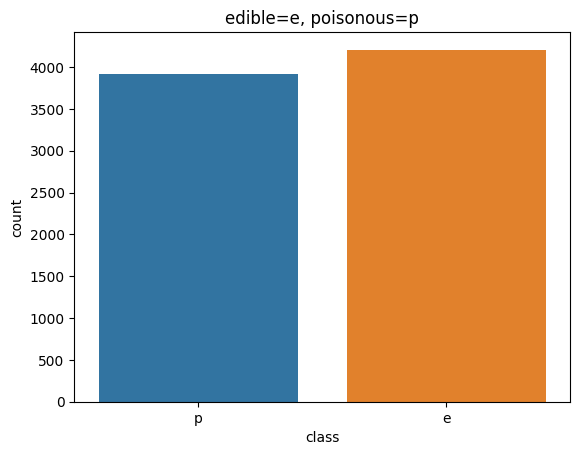

In [9]:
sns.countplot(x= 'class', data=df, )
plt.title('edible=e, poisonous=p')
plt.show()

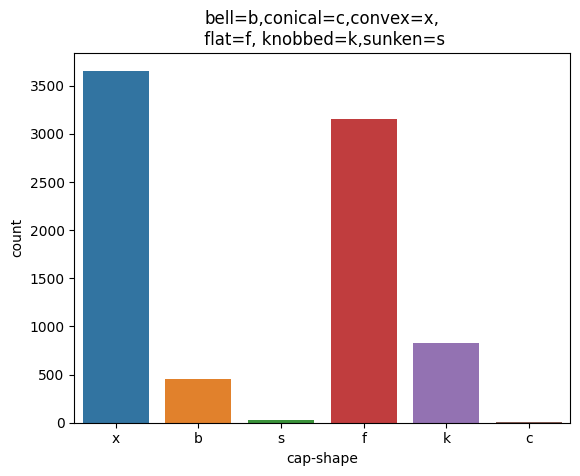

In [10]:
sns.countplot(x= 'cap-shape', data=df, )
plt.title('bell=b,conical=c,convex=x,\n flat=f, knobbed=k,sunken=s')
plt.show()

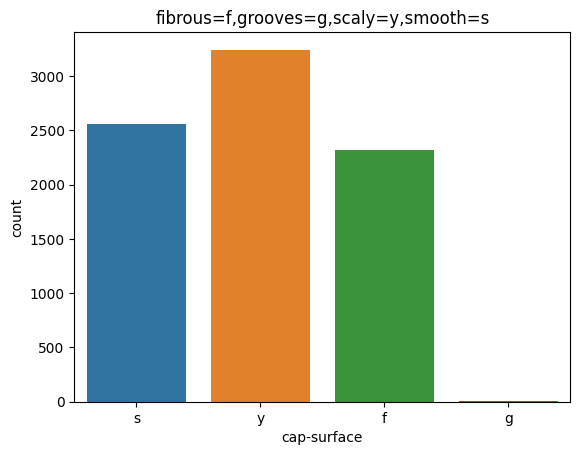

In [11]:
sns.countplot(x= 'cap-surface', data=df, )
plt.title('fibrous=f,grooves=g,scaly=y,smooth=s')
plt.show()

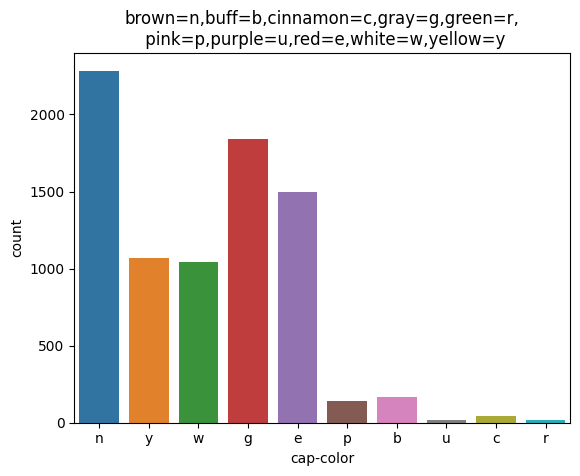

In [12]:
sns.countplot(x= 'cap-color', data=df, )
plt.title('brown=n,buff=b,cinnamon=c,gray=g,green=r,\n pink=p,purple=u,red=e,white=w,yellow=y')
plt.show()

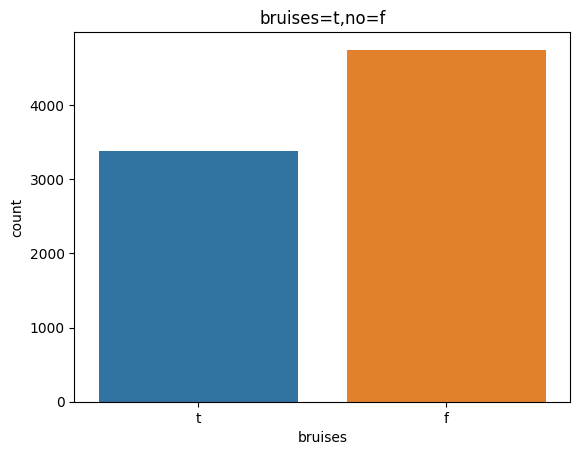

In [13]:
sns.countplot(x= 'bruises', data=df, )
plt.title('bruises=t,no=f')
plt.show()

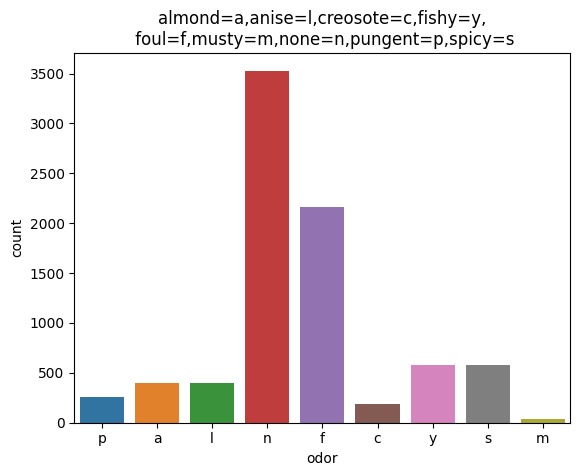

In [14]:
sns.countplot(x= 'odor', data=df, )
plt.title('almond=a,anise=l,creosote=c,fishy=y,\n foul=f,musty=m,none=n,pungent=p,spicy=s')
plt.show()

<Axes: xlabel='gill-attachment', ylabel='count'>

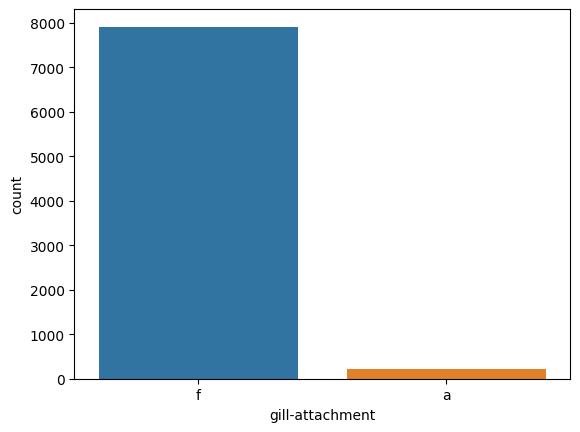

In [15]:
sns.countplot(x= 'gill-attachment', data=df, )

<Axes: xlabel='gill-spacing', ylabel='count'>

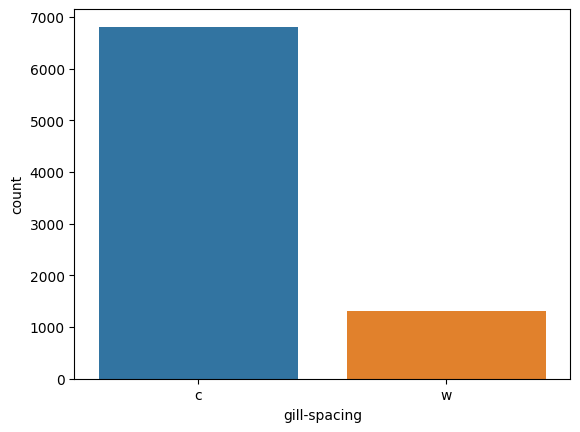

In [16]:
sns.countplot(x= 'gill-spacing', data=df, )

<Axes: xlabel='gill-color', ylabel='count'>

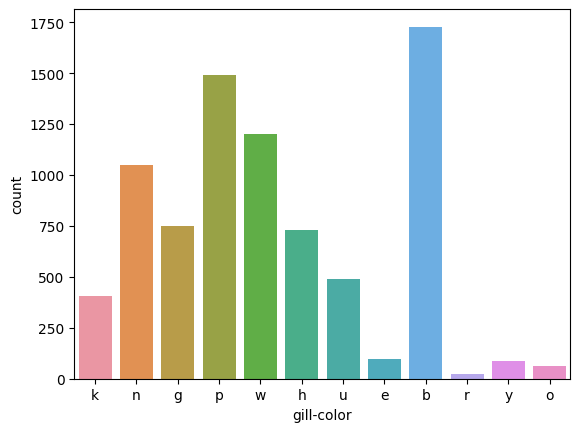

In [17]:
sns.countplot(x= 'gill-color', data=df, )

<Axes: xlabel='stalk-shape', ylabel='count'>

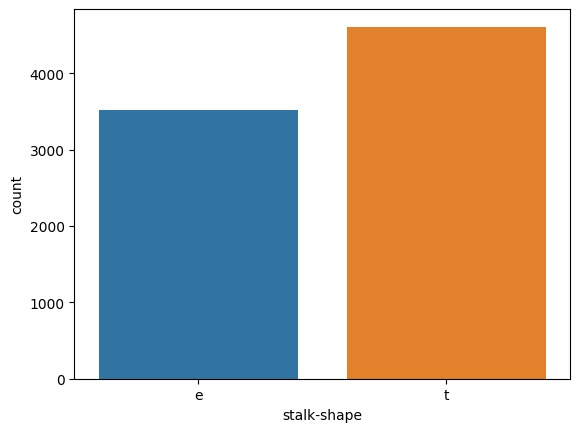

In [18]:
sns.countplot(x= 'stalk-shape', data=df, )

<Axes: xlabel='stalk-root', ylabel='count'>

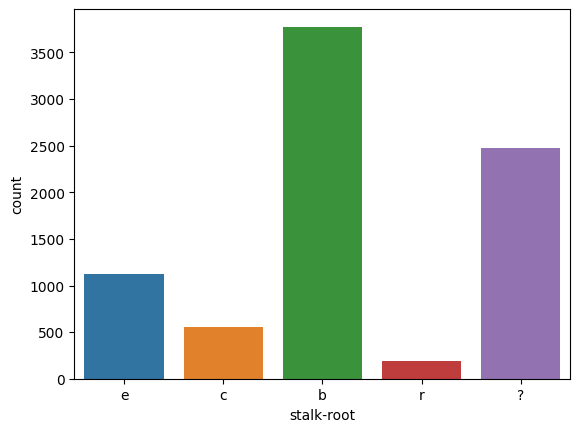

In [19]:
sns.countplot(x= 'stalk-root', data=df, )

<Axes: xlabel='stalk-surface-above-ring', ylabel='count'>

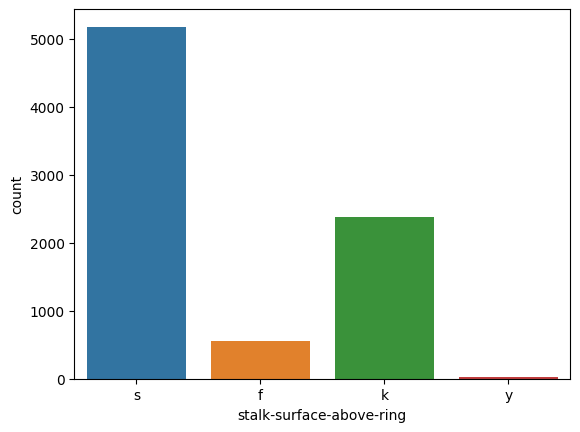

In [20]:
sns.countplot(x= 'stalk-surface-above-ring', data=df, )

<Axes: xlabel='stalk-surface-below-ring', ylabel='count'>

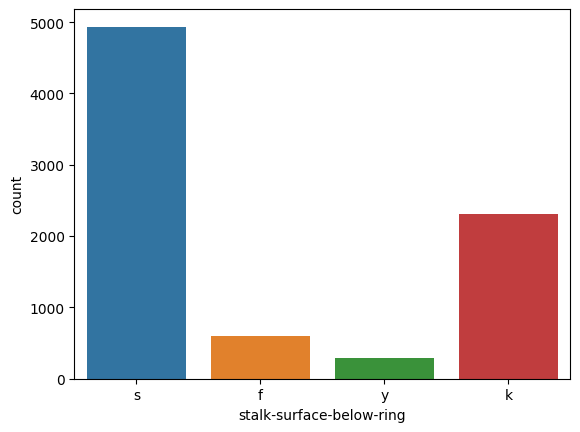

In [21]:
sns.countplot(x= 'stalk-surface-below-ring', data=df, )

<Axes: xlabel='stalk-color-above-ring', ylabel='count'>

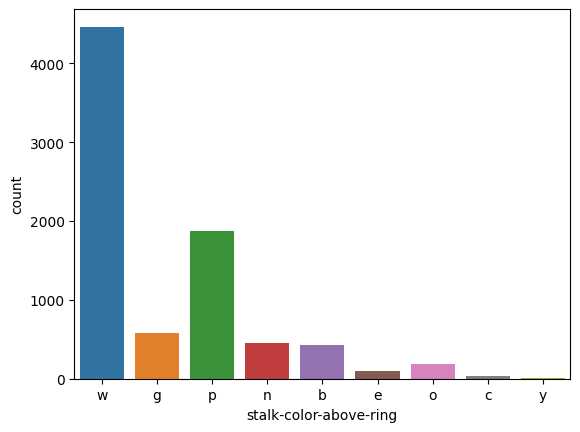

In [22]:
sns.countplot(x= 'stalk-color-above-ring', data=df, )

<Axes: xlabel='stalk-color-below-ring', ylabel='count'>

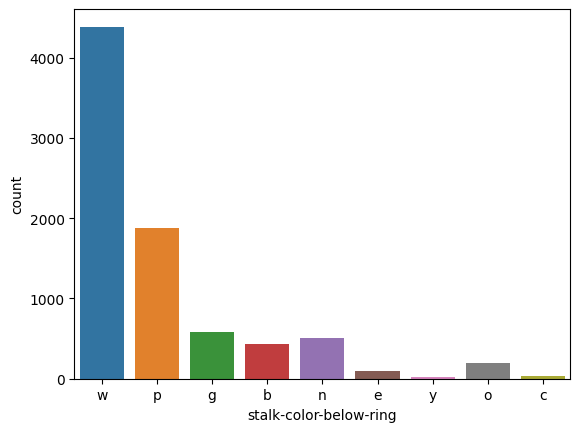

In [23]:
sns.countplot(x= 'stalk-color-below-ring', data=df, )

<Axes: xlabel='veil-type', ylabel='count'>

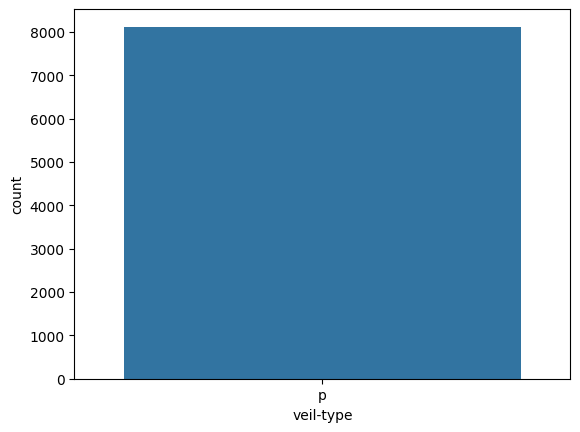

In [24]:
sns.countplot(x= 'veil-type', data=df, )

<Axes: xlabel='veil-color', ylabel='count'>

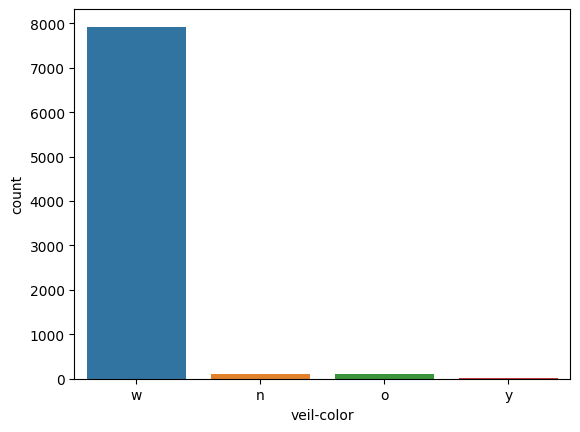

In [25]:
sns.countplot(x= 'veil-color', data=df, )

<Axes: xlabel='ring-number', ylabel='count'>

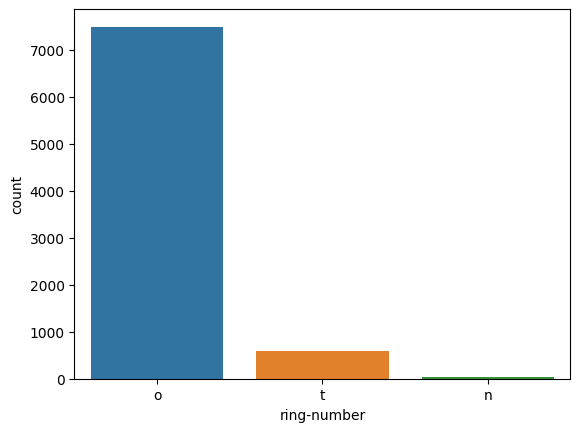

In [26]:
sns.countplot(x= 'ring-number', data=df, )

<Axes: xlabel='ring-type', ylabel='count'>

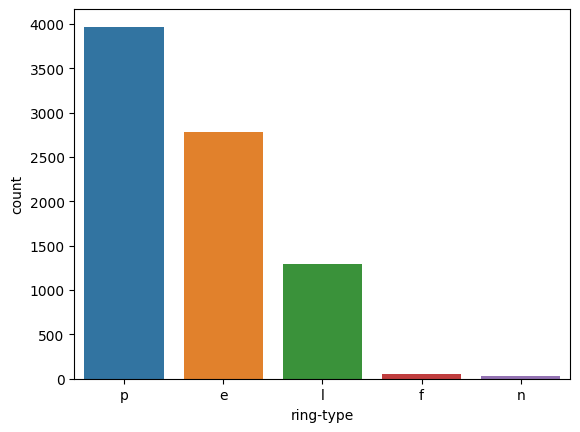

In [27]:
sns.countplot(x= 'ring-type', data=df, )

<Axes: xlabel='spore-print-color', ylabel='count'>

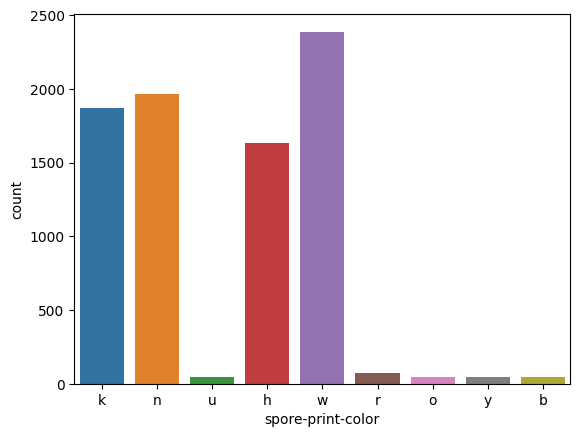

In [28]:
sns.countplot(x= 'spore-print-color', data=df, )

<Axes: xlabel='population', ylabel='count'>

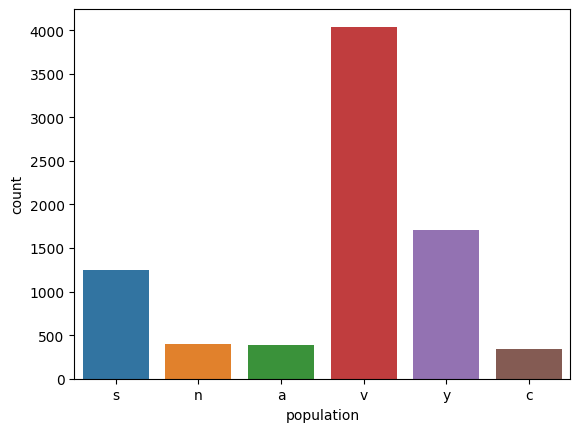

In [29]:
sns.countplot(x= 'population', data=df, )

<Axes: xlabel='habitat', ylabel='count'>

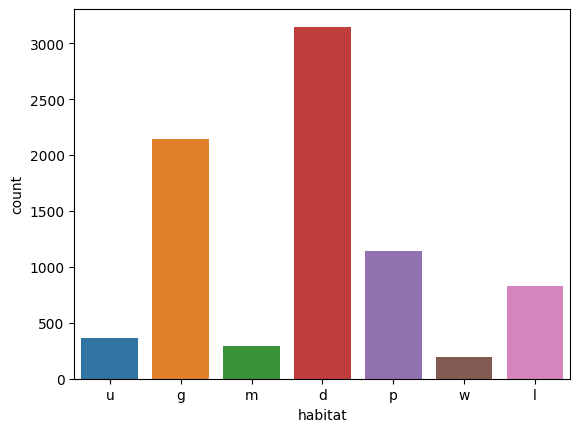

In [30]:
sns.countplot(x= 'habitat', data=df, )

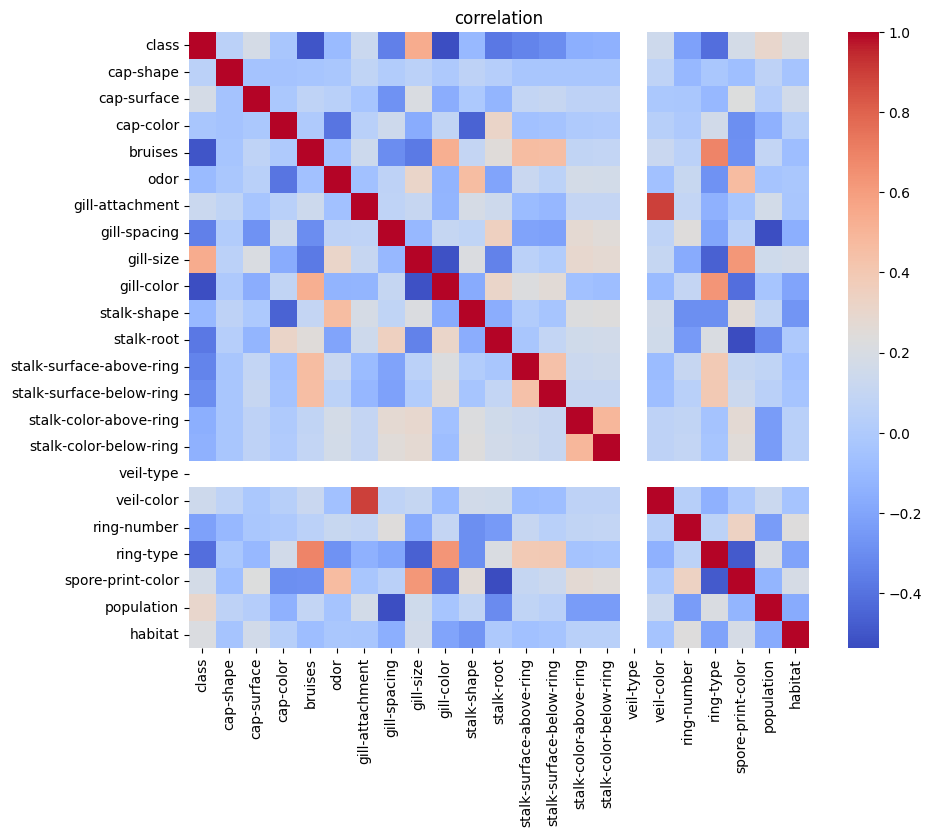

In [36]:
cor = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(cor, annot= False, cmap='coolwarm')
plt.title('correlation')
plt.show()

# Preprocessing

In [32]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [33]:
for i in df.columns:
    onehot = OneHotEncoder()
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i])

df.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [ ]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int32
 1   cap-shape                 8124 non-null   int32
 2   cap-surface               8124 non-null   int32
 3   cap-color                 8124 non-null   int32
 4   bruises                   8124 non-null   int32
 5   odor                      8124 non-null   int32
 6   gill-attachment           8124 non-null   int32
 7   gill-spacing              8124 non-null   int32
 8   gill-size                 8124 non-null   int32
 9   gill-color                8124 non-null   int32
 10  stalk-shape               8124 non-null   int32
 11  stalk-root                8124 non-null   int32
 12  stalk-surface-above-ring  8124 non-null   int32
 13  stalk-surface-below-ring  8124 non-null   int32
 14  stalk-color-above-ring    8124 non-null 

In [34]:
for i in df.columns:
    print(f'feature: {i}, unique values: {df[i].unique()}, total UVs: {len(df[i].unique())}')

feature: class, unique values: [1 0], total UVs: 2
feature: cap-shape, unique values: [5 0 4 2 3 1], total UVs: 6
feature: cap-surface, unique values: [2 3 0 1], total UVs: 4
feature: cap-color, unique values: [4 9 8 3 2 5 0 7 1 6], total UVs: 10
feature: bruises, unique values: [1 0], total UVs: 2
feature: odor, unique values: [6 0 3 5 2 1 8 7 4], total UVs: 9
feature: gill-attachment, unique values: [1 0], total UVs: 2
feature: gill-spacing, unique values: [0 1], total UVs: 2
feature: gill-size, unique values: [1 0], total UVs: 2
feature: gill-color, unique values: [ 4  5  2  7 10  3  9  1  0  8 11  6], total UVs: 12
feature: stalk-shape, unique values: [0 1], total UVs: 2
feature: stalk-root, unique values: [3 2 1 4 0], total UVs: 5
feature: stalk-surface-above-ring, unique values: [2 0 1 3], total UVs: 4
feature: stalk-surface-below-ring, unique values: [2 0 3 1], total UVs: 4
feature: stalk-color-above-ring, unique values: [7 3 6 4 0 2 5 1 8], total UVs: 9
feature: stalk-color-bel

In [35]:
df.replace({'veil-type': {0:1}})

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,1,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,1,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,1,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,1,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,1,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,1,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,1,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,1,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,1,2,1,0,7,4,2


In [37]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

# Model Training

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics


In [50]:
x = df.drop(['class'], axis=1)
y = df['class']

In [59]:
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.30,stratify=y)

In [67]:
names = ['logistic Regression', 'Decision Trees', 'Random Forest',  'XGBoost', 'SVM']

classifiers = [   
        LogisticRegression(),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        # KNeighborsClassifier(),
        XGBClassifier(),
        SVC(),
        
       
        ]

values = []
for name, clf in zip(names, classifiers):
            clf.fit(x_train, y_train)
            result=clf.predict(x_test)
            score = clf.score(x_test, y_test)
            values.append(score)


c:\Users\B\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


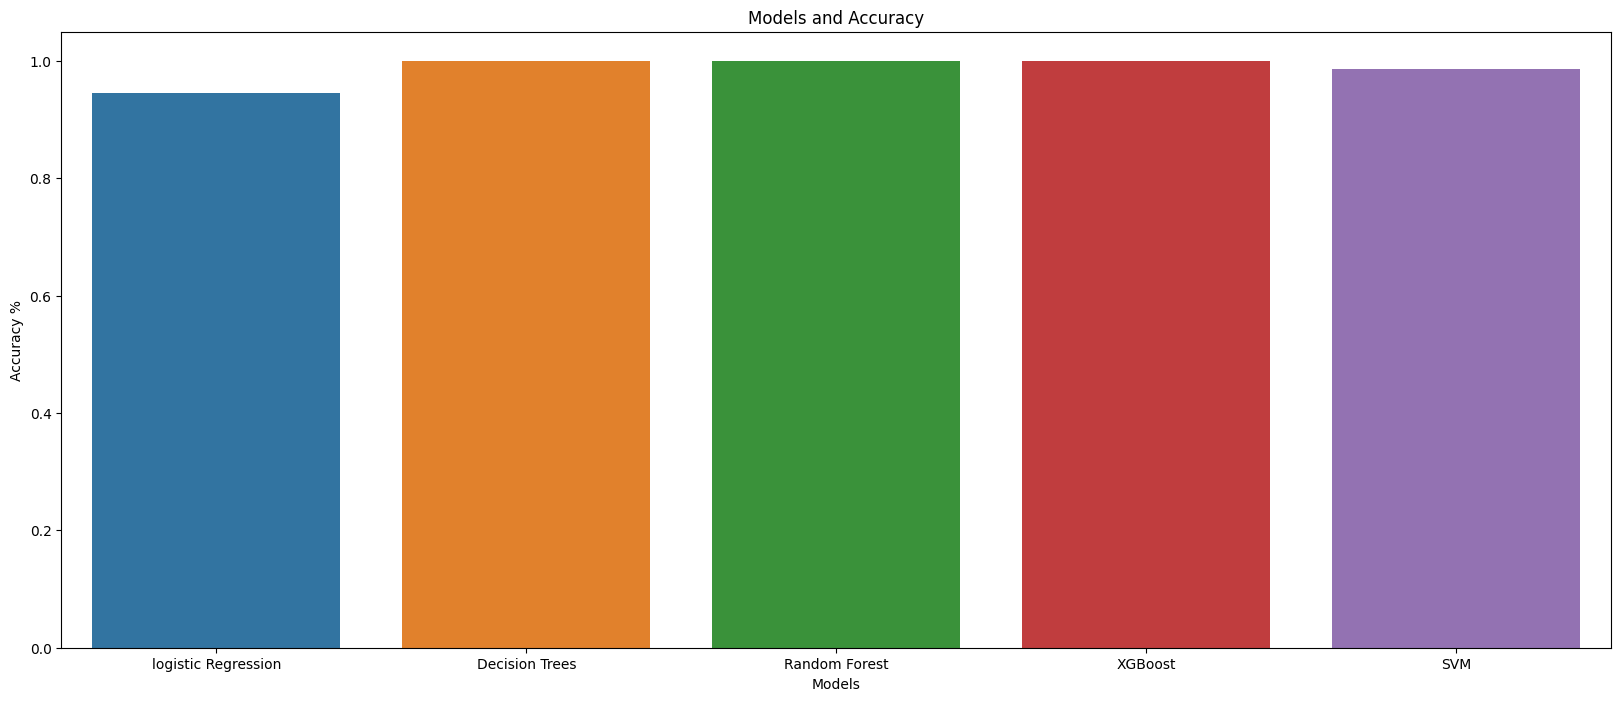

In [68]:
plt.figure(figsize=(20,8))
sns.barplot(x=names,y=values)
plt.xlabel('Models')
plt.ylabel('Accuracy %')
plt.title('Models and Accuracy')
plt.show()